In [5]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath("."))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from src import results
import importlib
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from src.plotting import plot_fill_between_mean_std,plot_fill_between_min_max
from src.plotting import plot_matrix_fill_between_mean_min_max,plot_matrix_fill_between_mean_std

Valores iniciais: 
- T_MIN=0.1
- T_MAX=6
- N_ANTS = 30
- EVAP_R=0.1
- ALPHA=1

In [6]:
folders = list(pathlib.Path("../../results/p_hat700/").glob("*_its"))

In [7]:
folders

[PosixPath('../../results/p_hat700/200_its'),
 PosixPath('../../results/p_hat700/150_its'),
 PosixPath('../../results/p_hat700/50_its'),
 PosixPath('../../results/p_hat700/100_its')]

In [8]:
results_agg_per_run = dict()
for folder in folders:
    folder_name = str(folder).split("/")[-1]
    files_of_folder = list(folder.glob("*.csv"))
    results_agg = results.ResultsAgg()
    results_agg.agg_files(files_of_folder, delimiter=",")
    results_agg_per_run[folder_name] = results_agg

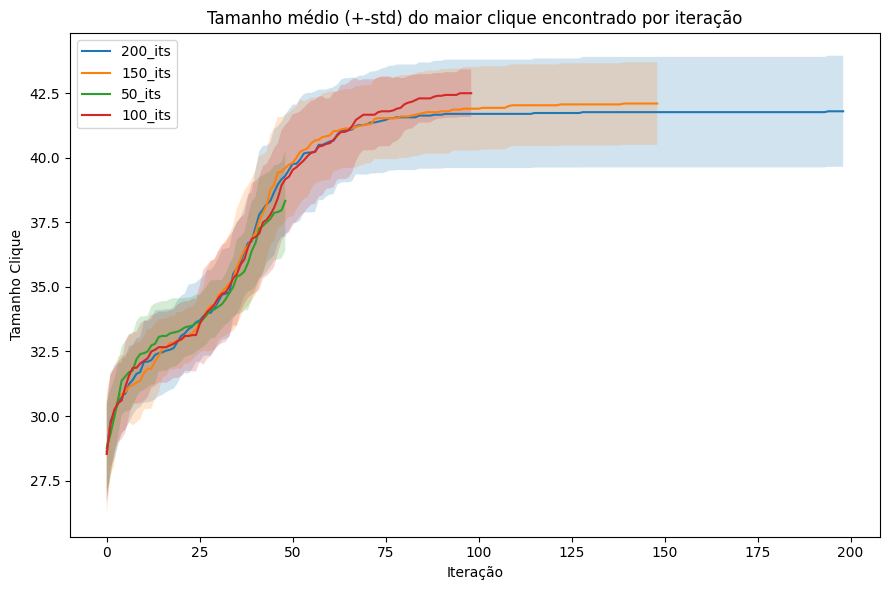

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (+-std) do maior clique encontrado por iteração")
fig.tight_layout()

Pelo gráfico acima é possível ver que o número de iterações executadas influencia na capacidade de encontrar cliques melhores. No caso de 50 iterações, o algoritmo ainda poderia continuar por mais algum tempo para melhorar o resultado. No caso de 200 iterações, parece que o melhor resultado já havia sido encontrado há algum tempo e, portanto, executou mais do que o necessário. Aparentemente, com 100 iterações já consegue-se uma ótima aproximação do melhor resultado encontrado.

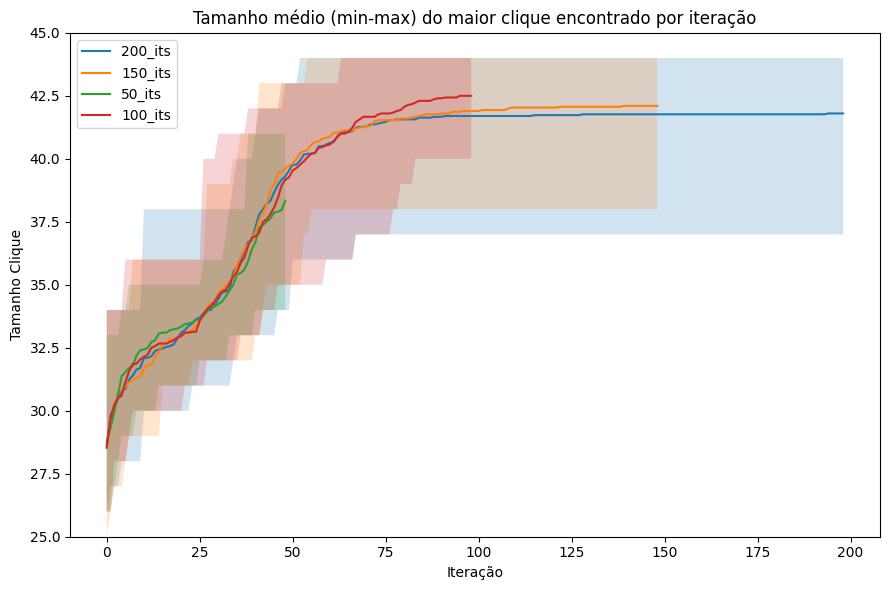

In [11]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    # plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (min-max) do maior clique encontrado por iteração")
plt.ylim((25, 45))
fig.tight_layout()

Esse gráfico confirma que com 100 iterações já pode-se conseguir o melhor resultado possível. Assim, ficou decidido que 100 iterações já eram o suficiente para conseguir o mehor resultado.